# Uber and Lyft Ride Data

## Import Library

In [138]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures ,  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from scipy.stats import boxcox
from scipy.stats import zscore

# Using PyOD For Detecting Anomalies
from pyod.utils.data import generate_data
from pyod.models.pca import PCA

## Data Preprocessing and Exploratory Analysis

In [139]:
filename = '/Users/macbookpro/Downloads/rideshare_kaggle.csv'
df = pd.read_csv(filename)
bonus = df
print(df)

                                          id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          ti

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [141]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [142]:
# Handling Missing Values & Duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print(df)

                                          id     timestamp  hour  day  month  \
0       424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1       4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2       981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3       c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4       e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   
...                                      ...           ...   ...  ...    ...   
693065  353e6566-b272-479e-a9c6-98bd6cb23f25  1.543708e+09    23    1     12   
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          ti

In [ ]:
# Detect Outliers (remove)
def find_outliers_IQR(df):
    outliers = pd.DataFrame()
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df[col][outlier_mask]
    return outliers

print(find_outliers_IQR(df))

def drop_outliers_IQR(df):
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

print(drop_outliers_IQR(df))



        timestamp  hour  day  month  price  distance  surge_multiplier  \
706           NaN   NaN  NaN    NaN   52.5       NaN              2.00   
707           NaN   NaN  NaN    NaN   67.5       NaN              2.00   
769           NaN   NaN  NaN    NaN   45.5       NaN               NaN   
1094          NaN   NaN  NaN    NaN   45.5       NaN               NaN   
1318          NaN   NaN  NaN    NaN   45.5       NaN               NaN   
...           ...   ...  ...    ...    ...       ...               ...   
692439        NaN   NaN  NaN    NaN   47.0      5.56               NaN   
692698        NaN   NaN  NaN    NaN   52.5       NaN              1.25   
692891        NaN   NaN  NaN    NaN   47.5       NaN               NaN   
692962        NaN   NaN  NaN    NaN   51.0      7.36               NaN   
693007        NaN   NaN  NaN    NaN   49.5      7.36               NaN   

        latitude  longitude  temperature  ...  precipIntensityMax  \
706          NaN        NaN          NaN  

In [144]:
#Categorial Variables to Numerical
dfs = df.select_dtypes(include=['object']).columns
for col in dfs:
    df[col] = pd.factorize(df[col])[0]

print(df)

            id     timestamp  hour  day  month  datetime  timezone  source  \
0            0  1.544953e+09     9   16     12         0         0       0   
1            1  1.543284e+09     2   27     11         1         0       0   
2            2  1.543367e+09     1   28     11         2         0       0   
3            3  1.543554e+09     4   30     11         3         0       0   
4            4  1.543463e+09     3   29     11         4         0       0   
...        ...           ...   ...  ...    ...       ...       ...     ...   
693065  637971  1.543708e+09    23    1     12     30647         0       9   
693066  637972  1.543708e+09    23    1     12     30647         0       9   
693067  637973  1.543708e+09    23    1     12     30647         0       9   
693069  637974  1.543708e+09    23    1     12     30647         0       9   
693070  637975  1.543708e+09    23    1     12     30647         0       9   

        destination  cab_type  ...  precipIntensityMax  uvIndex

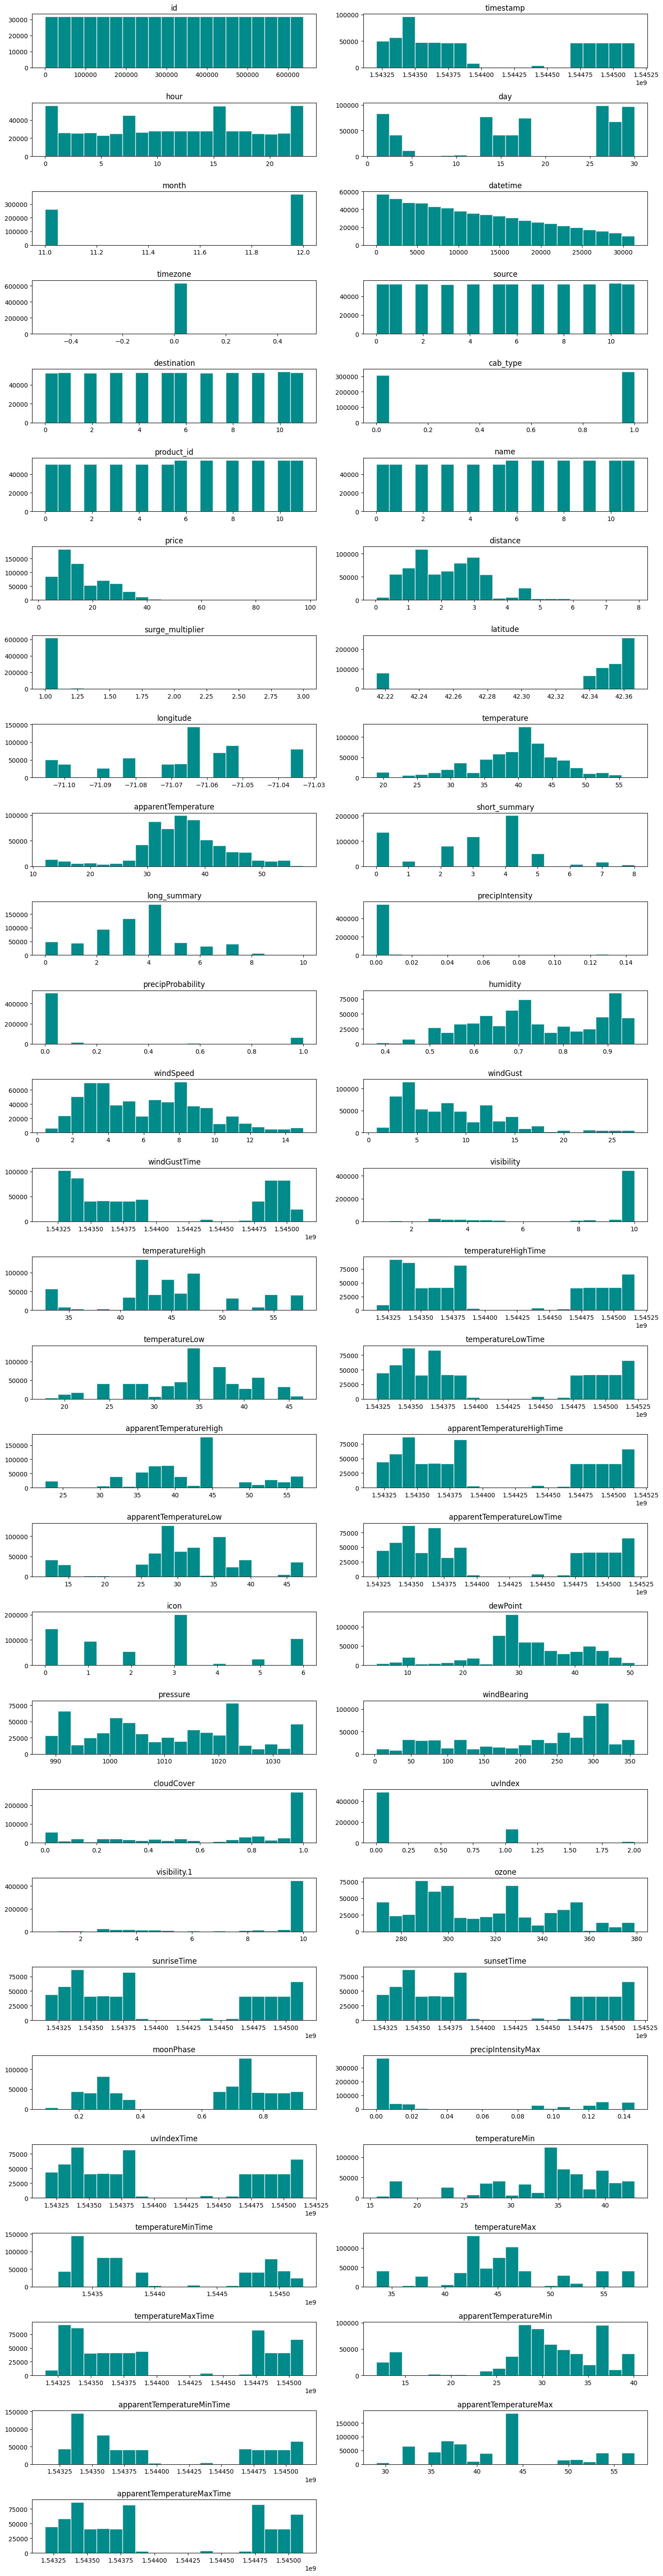

In [145]:
# EDA
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
num_cols = len(numeric_columns.columns)
num_rows = int(np.ceil(num_cols / 2))
fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 2))
axs = axs.flatten()
for i, col in enumerate(numeric_columns.columns):
    axs[i].hist(numeric_columns[col], bins=20, edgecolor="white" , color='darkcyan')
    axs[i].set_title(col)

for j in range(i + 1, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

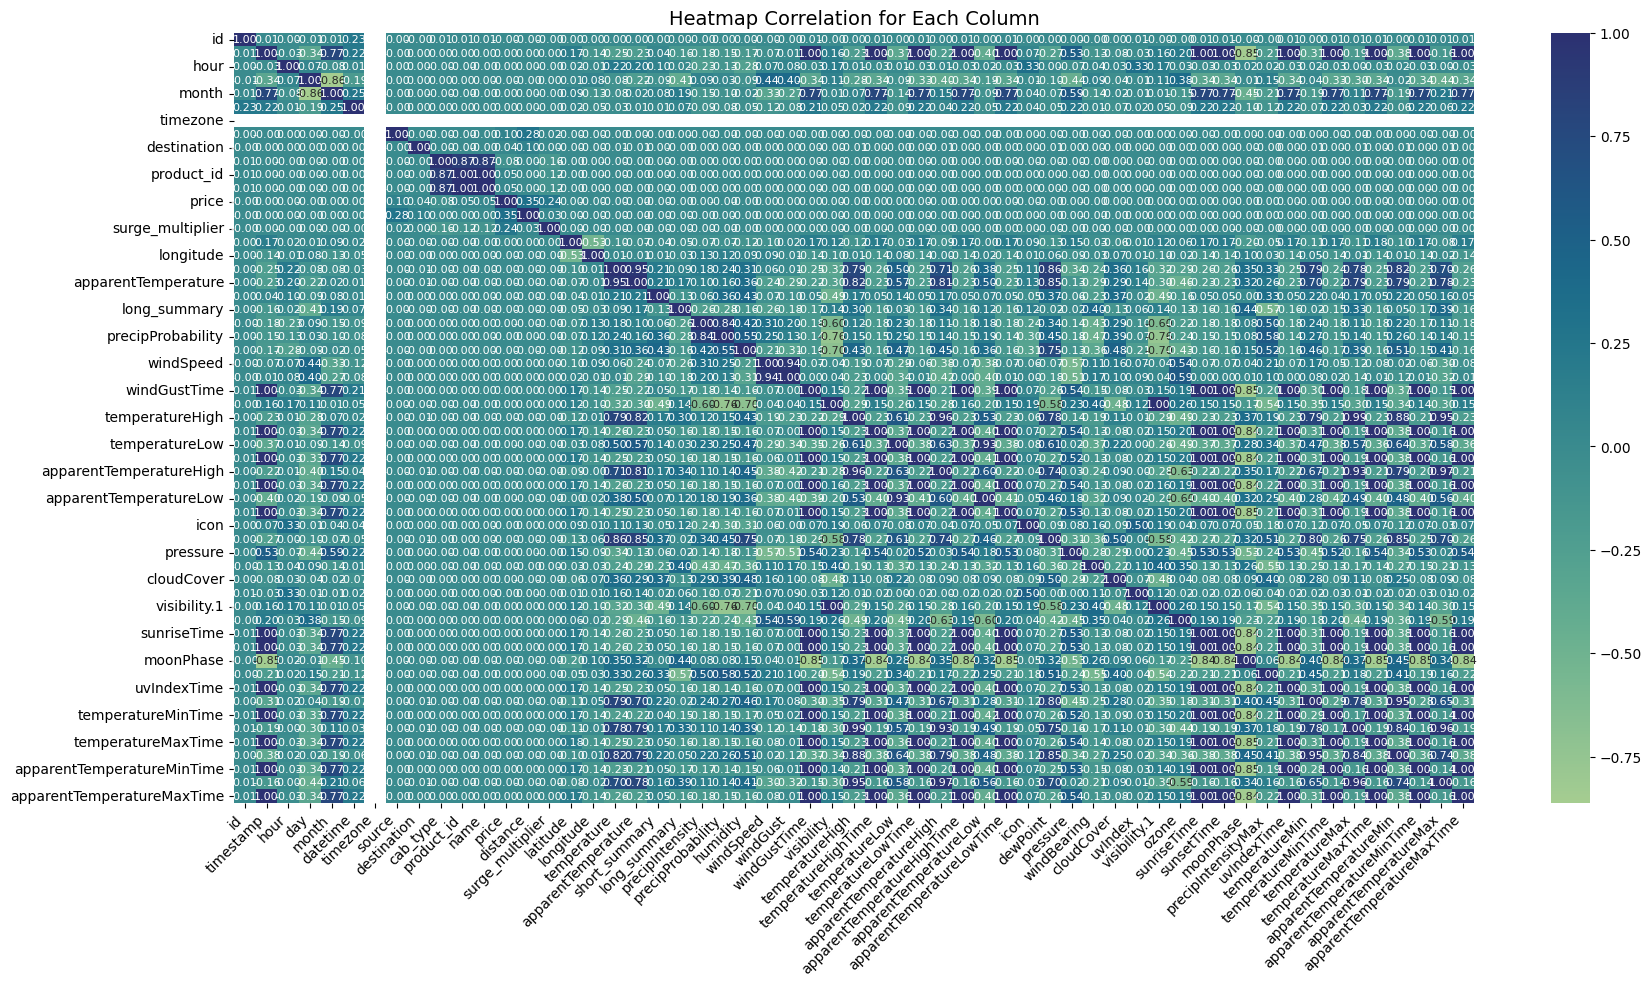

In [146]:
# [Heatmap] --> Correlation For Each Column
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Heatmap Correlation for Each Column", fontsize=14)
plt.show()

Text(0.5, 1.0, 'Ground Truth')

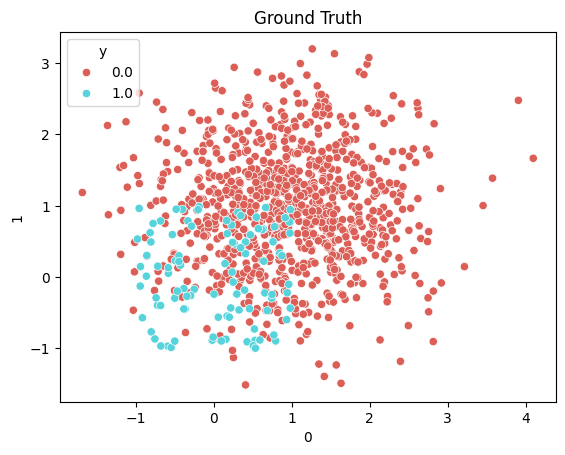

In [147]:
# Anomaly Detection with Python

# Generate Data
X_train, y_train = generate_data(train_only=True)
# Create dataframe from Pandas using the generated data
df_train = pd.DataFrame(X_train)
df_train['y'] = y_train

# Display first few rows
df_train.head()
sns.scatterplot(x=0, y=1, hue='y', data=df_train, palette="hls", legend="full")
plt.title('Ground Truth')


Text(0.5, 1.0, 'Anomaly Scores by PCA')

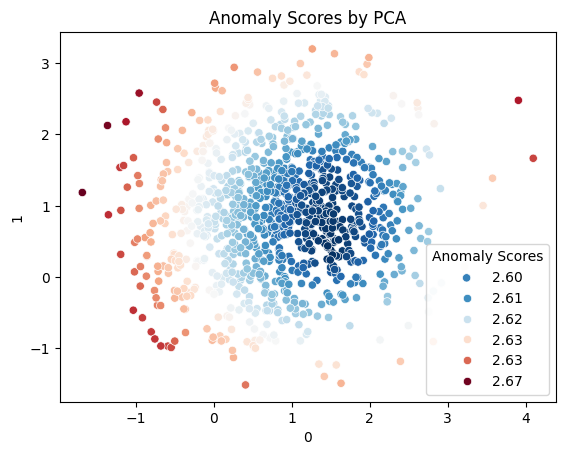

In [148]:
clf = PCA()
clf.fit(X_train)

y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_
ax = sns.scatterplot(x=0, y=1, hue=y_train_scores, data=df_train, palette="RdBu_r")

legend_labels = [f"{score:.2f}" for score in np.unique(y_train_scores)]  
ax.legend(title="Anomaly Scores", labels=legend_labels) 
plt.title('Anomaly Scores by PCA')

                                price
price                        1.000000
distance                     0.345061
surge_multiplier             0.240458
source                       0.096249
name                         0.045805
product_id                   0.045805
destination                  0.037621
latitude                     0.002088
visibility                   0.001497
visibility.1                 0.001497
windGust                     0.001218
precipIntensityMax           0.001114
windSpeed                    0.000990
month                        0.000913
cloudCover                   0.000883
pressure                     0.000866
datetime                     0.000857
windGustTime                 0.000851
apparentTemperatureLow       0.000831
apparentTemperatureMinTime   0.000814
timestamp                    0.000808
temperatureMinTime           0.000769
temperatureMaxTime           0.000766
uvIndexTime                  0.000763
apparentTemperatureLowTime   0.000761
sunsetTime  

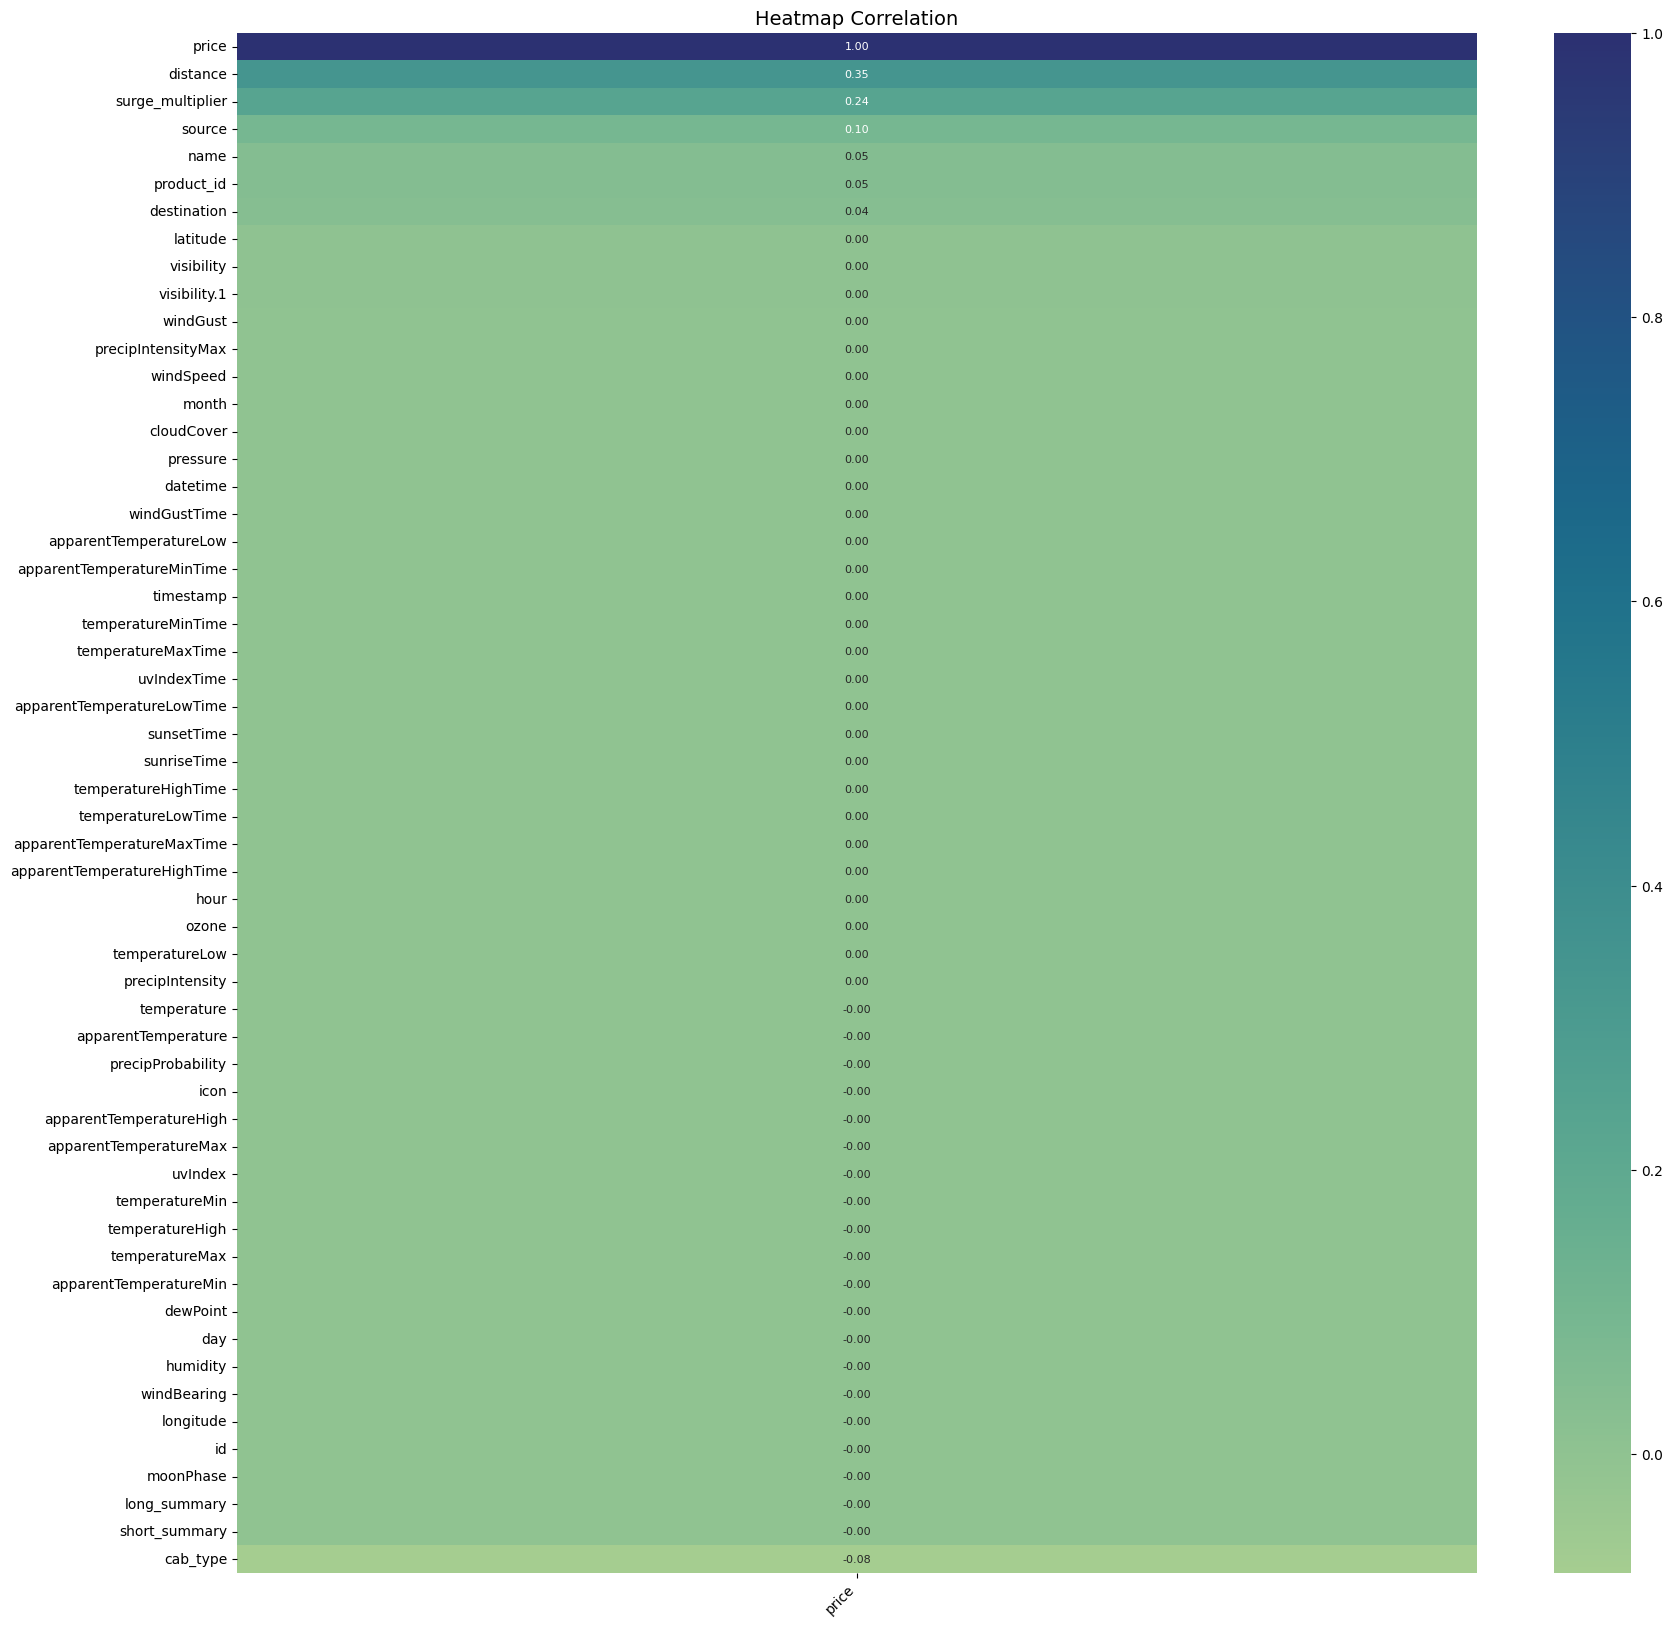

In [149]:
# [Heatmap] --> Correlation Price With Each Column
df = df.drop(columns=['timezone'])
corr_matrix = df.corr()
price_corr = corr_matrix[['price']].sort_values(by='price', ascending=False)
print(price_corr)

plt.figure(figsize=(20, 20))
sns.heatmap( price_corr, annot=True, cmap='crest', fmt=".2f", annot_kws={"size": 8})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title("Heatmap Correlation", fontsize=14)
plt.show()

              id  timestamp      hour       day     month  datetime    source  \
0      -1.732048   1.315960 -0.376833 -0.180090  0.839574 -1.430114 -1.594418   
1      -1.732043  -1.105077 -1.384206  0.921885 -1.191081 -1.429994 -1.594418   
2      -1.732037  -0.984940 -1.528116  1.022065 -1.191081 -1.429874 -1.594418   
3      -1.732032  -0.713960 -1.096385  1.222424 -1.191081 -1.429755 -1.594418   
4      -1.732026  -0.844868 -1.240295  1.122244 -1.191081 -1.429635 -1.594418   
...          ...        ...       ...       ...       ...       ...       ...   
637971  1.732026  -0.489348  1.637912 -1.682784  0.839574  2.236586  1.010217   
637972  1.732032  -0.489348  1.637912 -1.682784  0.839574  2.236586  1.010217   
637973  1.732037  -0.489348  1.637912 -1.682784  0.839574  2.236586  1.010217   
637974  1.732043  -0.489348  1.637912 -1.682784  0.839574  2.236586  1.010217   
637975  1.732048  -0.489348  1.637912 -1.682784  0.839574  2.236586  1.010217   

        destination  cab_ty

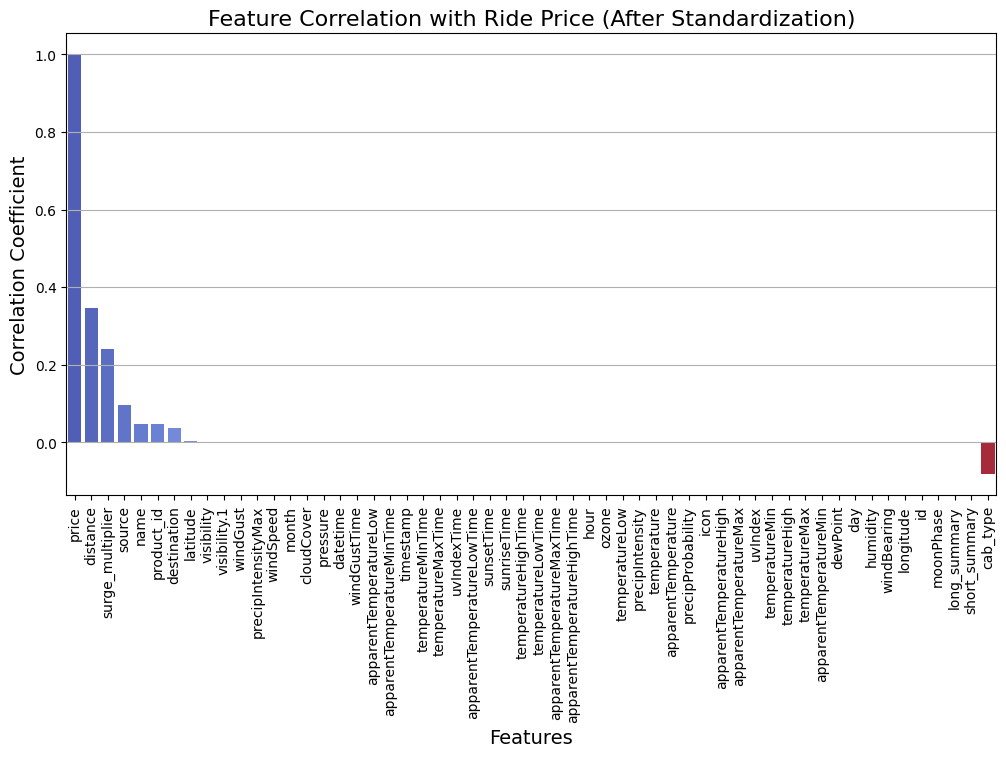

In [150]:
# Standardization
scaler = StandardScaler() 
df_standard = scaler.fit_transform(df.select_dtypes(include='number'))
result = pd.DataFrame(df_standard, columns=df.select_dtypes(include='number').columns)
print(result)

corr_with_price = result.corr()['price'].sort_values(ascending=False)
print(corr_with_price)

plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_price.index, y=corr_with_price.values, palette='coolwarm',legend=False, hue=corr_with_price.index)

plt.xticks(rotation=90)
plt.title("Feature Correlation with Ride Price (After Standardization)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Correlation Coefficient", fontsize=14)
plt.grid(axis='y')
plt.show()

## Baseline Linear Regression

In [151]:
X = df.drop(columns=['price'])  # Features
Y = df['price']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=0 , train_size=.80)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r_sq = model.score(X_train, y_train)
print(f"Coefficient of Determination (R2): {r_sq}")

Mean Absolute Error: 6.931000416821399
Mean Squared Error: 66.91942535007519
Coefficient of Determination (R2): 0.22745884290854346


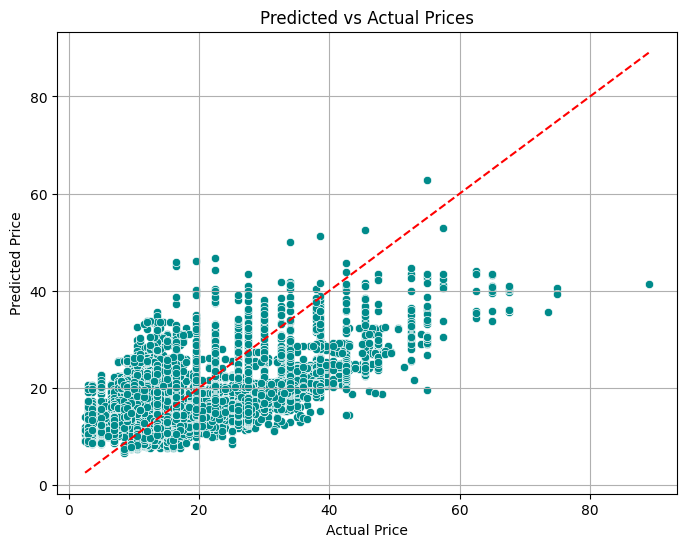

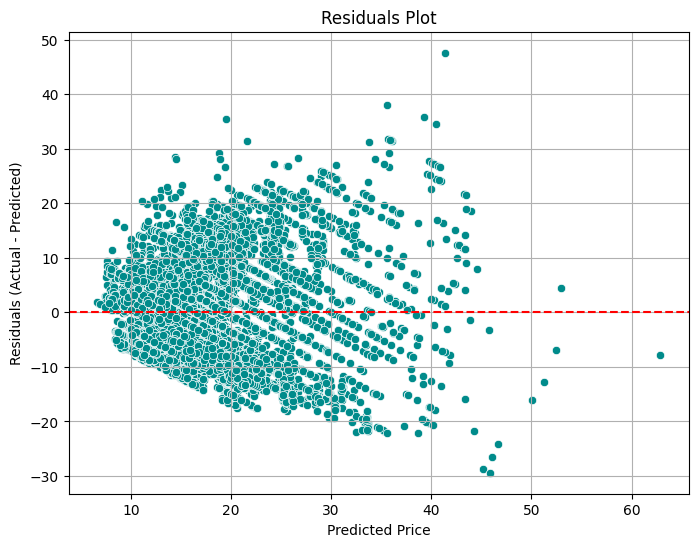

In [152]:
# Visualization

# (1) Scatter Plot: Predicted vs Actual Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='darkCyan', edgecolor="w")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.grid(True)
plt.show()

# (2) Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, color='darkCyan', edgecolor="w")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


Top 10 features with the most significant impact on ride price:
             Feature  Coefficient
12  surge_multiplier    20.754743
4              month    12.345591
8           cab_type    -8.428467
11          distance     2.803510
14         longitude     1.145469
21          humidity    -0.796864
13          latitude     0.701294
10              name     0.625509
9         product_id     0.625509
3                day     0.407807


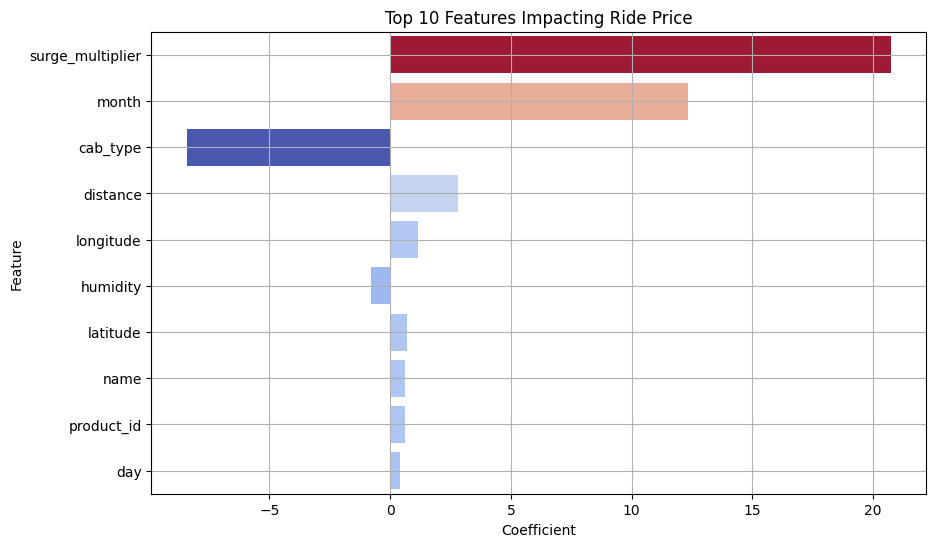

In [153]:
feature_names = X.columns
coefficients = model.coef_

# Create DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False)

print("Top 10 features with the most significant impact on ride price:")
print(coef_df[['Feature', 'Coefficient']].head(10))


plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10), palette='coolwarm' , hue='Coefficient' ,legend=False )
plt.title('Top 10 Features Impacting Ride Price')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

## Model Variants and Nonlinear Extensions

Ridge Best Alpha: 100.0
Ridge Train R2 Score: 0.23
Ridge Test R2 Score: 0.23
Ridge MAE: 6.93
Ridge MSE: 66.92

Lasso Best Alpha: 0.01
Lasso Train R2 Score: 0.23
Lasso Test R2 Score: 0.23
Lasso MAE: 6.92
Lasso MSE: 66.91


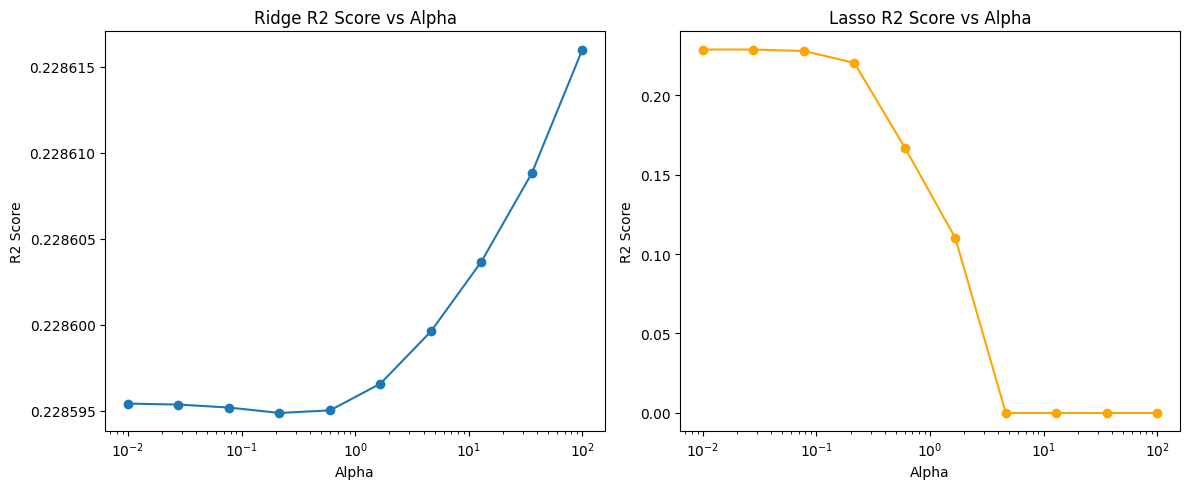

In [154]:

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Ridge Regression with Cross-Validation ---
ridge_alphas = np.logspace(-2, 2, 10)  # 10 values for alpha
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_cv.predict(X_test_scaled)

print(f"Ridge Best Alpha: {ridge_cv.alpha_}")
print(f"Ridge Train R2 Score: {ridge_cv.score(X_train_scaled, y_train):.2f}")
print(f"Ridge Test R2 Score: {ridge_cv.score(X_test_scaled, y_test):.2f}")
print(f"Ridge MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"Ridge MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")

# --- Lasso Regression with Cross-Validation ---
lasso_alphas = np.logspace(-2, 2, 10)
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5, max_iter=10000, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_cv.predict(X_test_scaled)

print(f"\nLasso Best Alpha: {lasso_cv.alpha_}")
print(f"Lasso Train R2 Score: {lasso_cv.score(X_train_scaled, y_train):.2f}")
print(f"Lasso Test R2 Score: {lasso_cv.score(X_test_scaled, y_test):.2f}")
print(f"Lasso MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"Lasso MSE: {mean_squared_error(y_test, y_pred_lasso):.2f}")

# --- Plotting Results ---
plt.figure(figsize=(12, 5))

# Ridge
plt.subplot(1, 2, 1)
plt.plot(ridge_alphas, [r2_score(y_test, Ridge(alpha=a).fit(X_train_scaled, y_train).predict(X_test_scaled)) for a in ridge_alphas], marker='o')
plt.xscale('log')
plt.title('Ridge R2 Score vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')

# Lasso
plt.subplot(1, 2, 2)
plt.plot(lasso_alphas, [r2_score(y_test, Lasso(alpha=a, max_iter=10000).fit(X_train_scaled, y_train).predict(X_test_scaled)) for a in lasso_alphas], marker='o', color='orange')
plt.xscale('log')
plt.title('Lasso R2 Score vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


In [155]:
# Polynomial Regression (Nonlinear Extension)
# Global polynomial transformation (degree 2)

poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1.0))

X_sample = X_train_scaled[:10000]
y_sample = y_train[:10000]

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_sample, y_sample)


y_pred_poly = poly_model.predict(X_test_scaled)
print("Polynomial R2 Score:", r2_score(y_test, y_pred_poly))
print("Polynomial MSE:", mean_squared_error(y_test, y_pred_poly))



Polynomial R2 Score: 0.25580214175031013
Polynomial MSE: 64.5593593081692


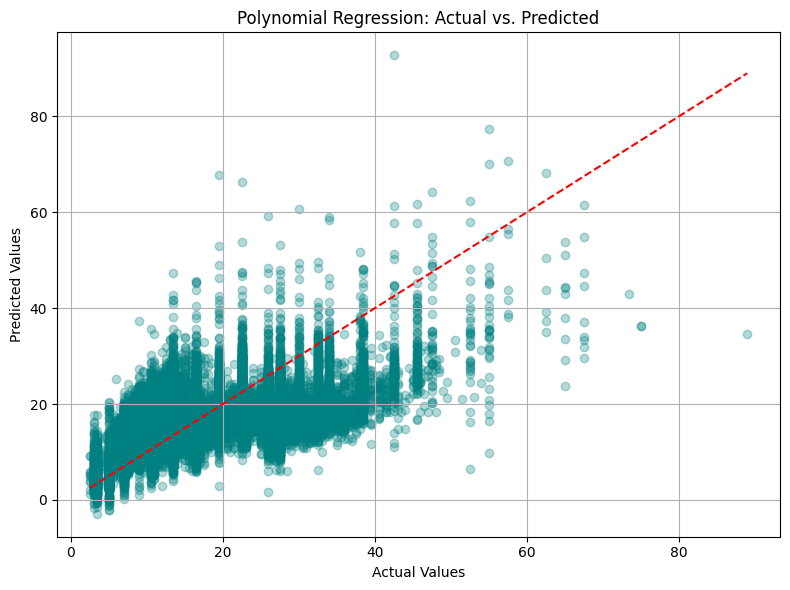

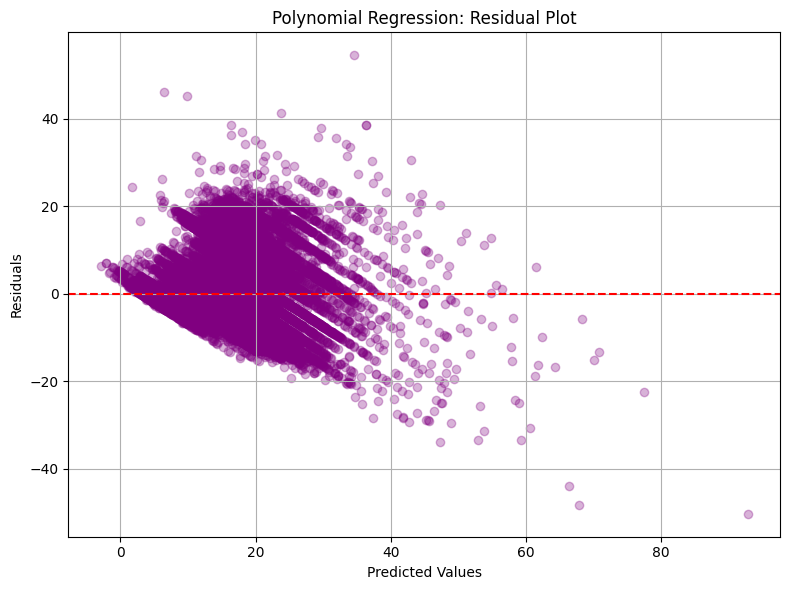

In [156]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs. Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_test - y_pred_poly

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals, alpha=0.3, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Polynomial Regression: Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()



## Model Enhancement through Data Preparation

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
source                         0.096249
name                           0.045805
product_id                     0.045805
destination                    0.037621
latitude                       0.002088
visibility                     0.001497
visibility.1                   0.001497
windGust                       0.001218
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
datetime                       0.000857
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761


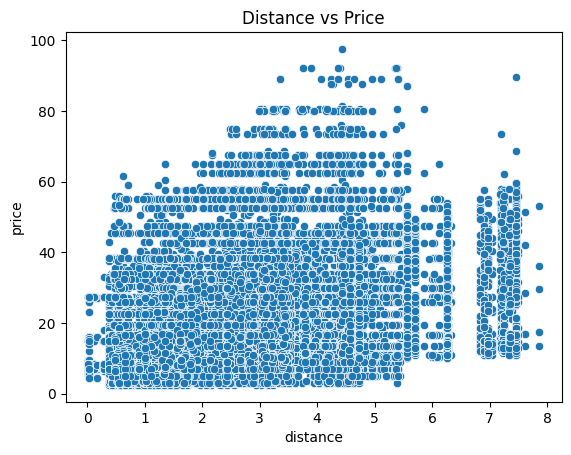

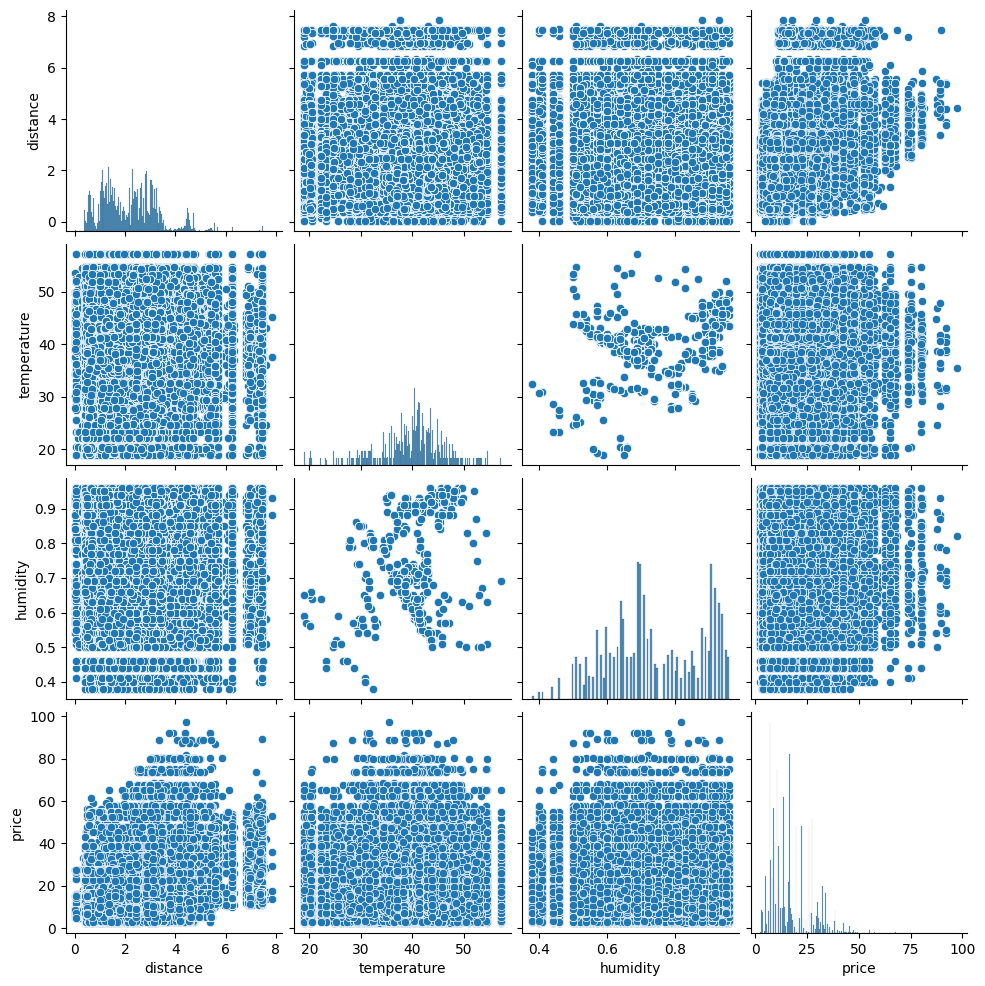

In [ ]:
# Creating interaction features between variables
correlation_matrix = df.corr()

print(correlation_matrix['price'].sort_values(ascending=False))

sns.scatterplot(x='distance', y='price', data=df)
plt.title("Distance vs Price")
plt.show()

sns.pairplot(df[['distance', 'temperature', 'humidity', 'price']])
plt.show()

In [ ]:
# Binning or encoding categorical values differently
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

binned_features = {}

for col in num_cols:
    try:
        binned_features[f'{col}_binning'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')
    except ValueError:
        print(f"Skipping {col} due to low unique values")

result = pd.concat([df, pd.DataFrame(binned_features)], axis=1).copy()
print(result)
        
# Encoding        
le = LabelEncoder()
df['cab_type_encoded'] = le.fit_transform(df['cab_type'])  

df_encoded = pd.get_dummies(df, columns=['source', 'destination'], drop_first=True)

df['source_encoded'] = df.groupby('source')['price'].transform('mean')
print(df['source_encoded'])

            id     timestamp  hour  day  month  datetime  source  destination  \
0            0  1.544953e+09     9   16     12         0       0            0   
1            1  1.543284e+09     2   27     11         1       0            0   
2            2  1.543367e+09     1   28     11         2       0            0   
3            3  1.543554e+09     4   30     11         3       0            0   
4            4  1.543463e+09     3   29     11         4       0            0   
...        ...           ...   ...  ...    ...       ...     ...          ...   
693065  637971  1.543708e+09    23    1     12     30647       9            9   
693066  637972  1.543708e+09    23    1     12     30647       9            9   
693067  637973  1.543708e+09    23    1     12     30647       9            9   
693069  637974  1.543708e+09    23    1     12     30647       9            9   
693070  637975  1.543708e+09    23    1     12     30647       9            9   

        cab_type  product_i

In [ ]:
# Identifying and filtering noisy or low-quality samples

z_scores = np.abs(zscore(X_train_scaled))
mask = (z_scores < 3).all(axis=1)

X_train_filtered = X_train_scaled[mask]
y_train_filtered = y_train[mask]

Q1 = pd.DataFrame(X_train).quantile(0.25)
Q3 = pd.DataFrame(X_train).quantile(0.75)
IQR = Q3 - Q1

mask = ~((pd.DataFrame(X_train) < (Q1 - 1.5 * IQR)) | (pd.DataFrame(X_train) > (Q3 + 1.5 * IQR))).any(axis=1)

X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

y_low, y_high = np.percentile(y_train, [1, 99])
mask = (y_train >= y_low) & (y_train <= y_high)

X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]



base_model = LinearRegression()
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_train_scaled)

residuals = np.abs(y_train - y_pred)
threshold = np.percentile(residuals, 95)

mask = residuals < threshold
X_train_filtered = X_train_scaled[mask]
y_train_filtered = y_train[mask]

print(f'result of the answer is {X_train_filtered.shape[0]} samples')
print(f'result of the answer is {X_train_filtered.shape[1]} features')


result of the answer is 484861 samples
result of the answer is 55 features


## Bonus (Optional)

    day        r2        mse
0     1  0.281029  62.888712
1     2  0.275676  63.366344
2     3  0.276286  61.821613
3     4  0.287218  63.171142
4     9  0.285210  61.150225
5    10  0.262812  61.166509
6    13  0.275581  62.566890
7    14  0.276658  62.596271
8    15  0.270518  63.220973
9    16  0.275022  63.058109
10   17  0.280534  62.838382
11   18  0.276341  64.081712
12   26  0.270938  62.664751
13   27  0.278427  63.306614
14   28  0.278332  62.805407
15   29  0.274742  62.657522
16   30  0.274978  62.767939
    hour        r2        mse
0      0  0.285278  62.669701
1      1  0.272631  63.364460
2      2  0.273078  63.513850
3      3  0.268055  62.828415
4      4  0.275779  62.857829
5      5  0.272761  63.094313
6      6  0.279007  62.894707
7      7  0.267470  63.031635
8      8  0.280079  63.071463
9      9  0.273547  62.434426
10    10  0.274380  61.683806
11    11  0.285280  63.983369
12    12  0.281651  62.158887
13    13  0.276593  63.196614
14    14  0.272322  63.30545

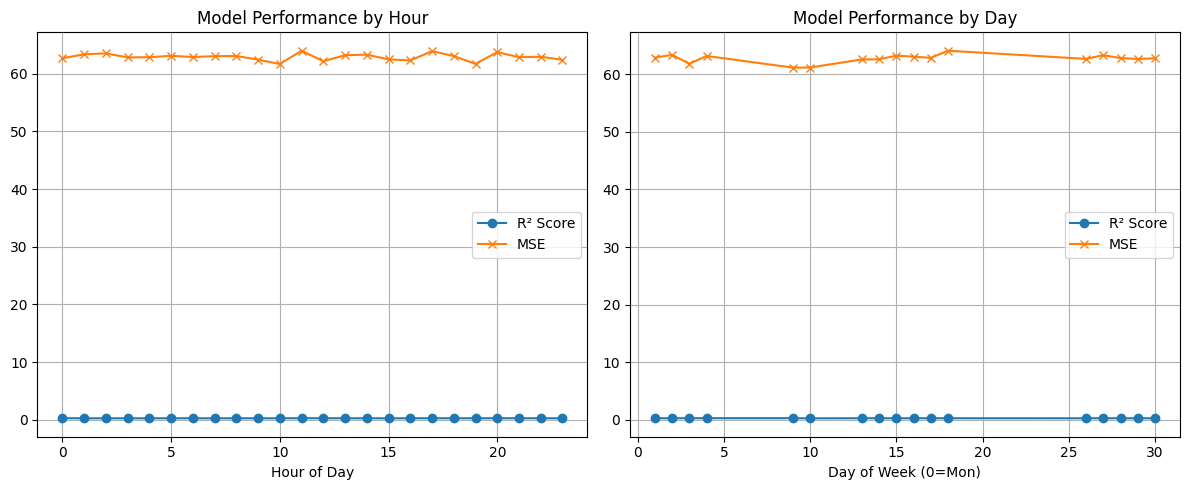

In [161]:
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Convert datetime and extract features
bonus['datetime'] = pd.to_datetime(bonus['datetime'])



# Transformation function
def transform_skewed_features(X):
    X_transformed = X.copy()
    for col in X.columns:
        X_col = X[col].replace([np.inf, -np.inf], np.nan).dropna()

        if X_col.nunique() <= 1 or X_col.isnull().all():
            X_transformed[col] = X[col].fillna(0)
            continue

        try:
            if (X_col <= 0).any():
                X_transformed[col] = np.log1p(X[col] - X_col.min() + 1)
            else:
                transformed, _ = boxcox(X_col)
                temp_series = pd.Series(transformed, index=X_col.index)
                X_transformed[col] = temp_series.reindex(X.index, fill_value=temp_series.mean())
        except Exception:
            X_transformed[col] = np.log1p(X[col] - X_col.min() + 1)

    # Replace any remaining inf or NaNs
    X_transformed = X_transformed.replace([np.inf, -np.inf], np.nan).fillna(0)
    return X_transformed


# Reusable training function
def evaluate_by_group(data, group_col):
    results = []
    for group_val in sorted(data[group_col].dropna().unique()):
        subset = data[data[group_col] == group_val].copy()
        subset = subset.dropna(subset=['price'])

        X = subset.drop(columns=['price', 'datetime', 'hour', 'day'], errors='ignore')
        X = X.select_dtypes(include='number')
        y = subset['price']

        if X.shape[0] < 5:
            continue

        X = transform_skewed_features(X)
        X_scaled = StandardScaler().fit_transform(X)

        model = Ridge(alpha=1.0)
        model.fit(X_scaled, y)
        y_pred = model.predict(X_scaled)

        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        results.append({group_col: group_val, 'r2': r2, 'mse': mse})

    return pd.DataFrame(results)

# Evaluate by hour and day
results_hour = evaluate_by_group(bonus, 'hour')
results_day = evaluate_by_group(bonus, 'day')
print(results_day)
print(results_hour)
# Plot hourly performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_hour['hour'], results_hour['r2'], label='R² Score', marker='o')
plt.plot(results_hour['hour'], results_hour['mse'], label='MSE', marker='x')
plt.xlabel('Hour of Day')
plt.title('Model Performance by Hour')
plt.legend()
plt.grid(True)

# Plot daily performance
plt.subplot(1, 2, 2)
plt.plot(results_day['day'], results_day['r2'], label='R² Score', marker='o')
plt.plot(results_day['day'], results_day['mse'], label='MSE', marker='x')
plt.xlabel('Day of Week (0=Mon)')
plt.title('Model Performance by Day')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

